# Game of Life

---

- _Student ID and Name:_ A01650943 Ricardo

- _Student ID and Name:_ A01651153 Eduardo

- _Student ID and Name:_ A01650939 Pedro

- _Student ID and Name:_ A01650390 Alejandro

### Objetivo

En esta actividad los alumnos deberán aplicar los conceptos de programación funcional utilizando Clojure para resolver el juego de la vida de Conway.

---

### Planteamiento
John Horton Conway, que murió a los 82 años después de contraer el Covid-19, fue uno de los matemáticos británicos más prolíficos y carismáticos del siglo XX. Participó activamente en muchas ramas de las matemáticas, incluida la teoría de grupos, la teoría de la codificación, la teoría de nudos, la geometría, la teoría de números y las formas cuadráticas, así como en matemáticas recreativas.
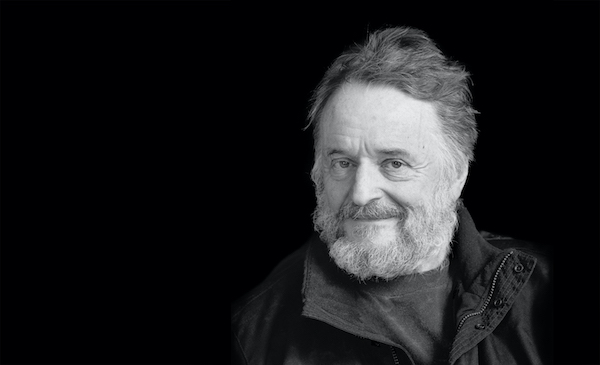


El Juego de la Vida (un ejemplo de un autómata celular) se juega en una cuadrícula rectangular bidimensional infinita de celdas. Cada celda puede estar viva o muerta. El estado de cada celda cambia en cada turno del juego (también llamado generación) dependiendo de los estados de los 8 vecinos de esa celda. Los vecinos de una celda son celdas que tocan esa celda, ya sea horizontal, vertical o diagonal desde esa celda.

El patrón inicial es la primera generación. La segunda generación pasa de aplicar las reglas simultáneamente a cada celda del tablero de juego, es decir, los nacimientos y las muertes ocurren simultáneamente. Posteriormente, las reglas se aplican iterativamente para crear generaciones futuras. Para cada generación del juego, el estado de una celda en la próxima generación está determinado por un conjunto de reglas. Estas simples reglas son las siguientes:

1. Si la celda está viva, permanecerá viva si tiene 2 o 3 vecinos vivos.

2. Si la celda está viva, muere si tiene más de  3 vecinos vivos.

3. Si la celda está viva, muere si tiene menos de 2 vivos.

4. Si la celda está muerta, cobra vida solo en el caso de que tenga 3 vecinos vivos.



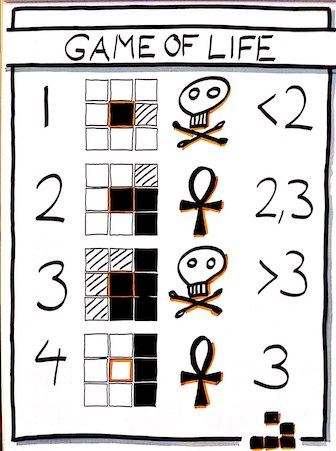

---

### Instrucciones
1. Investiga qué es el juego de la vida.
2. Implementa el juego de la vida para un tamaño de matriz `m` y para `n` generaciones.
3. Utiliza: colecciones lazy, records o atoms, funciones o macros y los temas que creas necesarios de Clojure.
4. Debes imprimir:
    1. Matriz inicial de `m` x `m`
    2. Imprimir de la 1 hasta la n generación del juego.

Recuerda que el tamaño del mundo es de `m` x `m`, el valor mínimo de `m` es de `5`.





In [1]:
;; matrix size (m x m)
(def m 5)

#'user/m

In [2]:
(def matrix (ref [[0 0 0 0 0] [0 0 0 0 0] [0 1 1 1 0] [0 0 0 0 0] [0 0 0 0 0]]))

#'user/matrix

In [3]:
(defn print-matrix [matrix]
    (map println matrix)
)

#'user/print-matrix

In [4]:
(defn get-cell [matrix row col]
    (get (get matrix row) col)
)

#'user/get-cell

In [5]:
(defn exists-cell? [matrix x y]
    (let [cell (get-cell matrix x y)]
        (if (nil? cell) 
             0
            (if (= 0 cell)
                 0
                 1
            )
        )
    )
)

#'user/exists-cell?

In [6]:
(defn check-adjacency [matrix x y]
    (let [neighbors (ref 0)]
        (dosync
            ;; up-left
            (alter neighbors + (exists-cell? matrix (dec x) (dec y)) )
            ;; up
            (alter neighbors + (exists-cell? matrix (dec x) y) )
            ;; up-right
            (alter neighbors + (exists-cell? matrix (dec x) (inc y)) )
            ;; left
            (alter neighbors + (exists-cell? matrix x (dec y)) )
            ;; right
            (alter neighbors +  (exists-cell? matrix x (inc y)) )
            ;; bottom-left
            (alter neighbors +  (exists-cell? matrix (inc x) (dec y)) )
            ;; bottom
            (alter neighbors +  (exists-cell? matrix (inc x) y) )
            ;; bottom-right
            (alter neighbors + (exists-cell? matrix (inc x) (inc y)) )
        )
        @neighbors
    )
)

#'user/check-adjacency

In [7]:
(defn check-rules [matrix x y]
    (let [cell (get-cell matrix x y) neighbors (check-adjacency matrix x y)]
        (if (= cell 1)
            (if (or (= neighbors 2) (= neighbors 3))
                1
                0
            )
            (if (= neighbors 3)
                1
                0
            )
        )
    )
)

#'user/check-rules

In [8]:
(defn new-generation [matrix]
    (let [ng-matrix (ref (vec (repeat m [])))]
        (dosync 
            (loop [x 0]
                (when (< x m)
                    (alter ng-matrix assoc-in [x] (vec (map #(check-rules @matrix x %) (range m))))
                    (recur (inc x))
                )
            )
            (ref-set matrix @ng-matrix)
            (print (print-matrix @matrix) "\n\n")
        )
    )
)

#'user/new-generation

In [9]:
(defn game-of-life [matrix n-gens]
    (for [i (range n-gens)]
        (new-generation matrix)
    )
)

#'user/game-of-life

In [10]:
(game-of-life matrix 10)

(([0 0 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

([0 0 0 0 0]
[0 0 0 0 0]
[0 1 1 1 0]
[0 0 0 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

([0 0 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

([0 0 0 0 0]
[0 0 0 0 0]
[0 1 1 1 0]
[0 0 0 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

([0 0 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

([0 0 0 0 0]
[0 0 0 0 0]
[0 1 1 1 0]
[0 0 0 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

([0 0 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

([0 0 0 0 0]
[0 0 0 0 0]
[0 1 1 1 0]
[0 0 0 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

([0 0 0 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 1 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

([0 0 0 0 0]
[0 0 0 0 0]
[0 1 1 1 0]
[0 0 0 0 0]
[0 0 0 0 0]
nil nil nil nil nil) 

nil nil nil nil nil nil nil nil nil nil)